# L'IA au service des agents immobiliers - Silicon Valley

<a class="anchor" id="retour">Retour au Sommaire</a>

* [Model de Machine Learning](#chap1)

* [Linear Regression](#chap2)
    * [Test avec PCA](#sec1)
    * [Test avec les données Standardisées](#sec2)
    * [Test avec les données Normalisées](#sec3)

## Model de Machine Learning <a class="anchor" id="chap1"></a>

### Importation

In [80]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [82]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance

### Lecture du dataset nettoyé

In [83]:
df_californie = pd.read_csv('df_californie.csv')
df_californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2.0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2.0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2.0
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2.0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,4.0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2.0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0


## Linear Regression <a class="anchor" id="chap2"></a> [Retour](#retour)

In [84]:
X= df_californie.drop('median_house_value', axis=1)
y= df_californie['median_house_value']

# Splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=40)

In [85]:
#creat the model
log_model = LinearRegression()
#fit
log_model.fit(X_train, y_train)
#predict
y_pred = log_model.predict(X_test)

log_model.score(X_test,y_test)

0.6156028588903397

In [86]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1889,-122.08,37.89,39.0,3018.0,501.0,1223.0,489.0,6.2924,4.0
11703,-117.85,33.74,26.0,2589.0,1003.0,5756.0,983.0,2.1992,1.0
11321,-118.32,33.84,42.0,1486.0,420.0,897.0,377.0,1.6228,1.0
6118,-117.20,34.12,24.0,3532.0,618.0,1681.0,590.0,3.5000,2.0
12785,-118.07,33.79,34.0,2473.0,383.0,967.0,353.0,5.8283,1.0
...,...,...,...,...,...,...,...,...,...
8127,-121.91,37.33,52.0,2562.0,410.0,973.0,398.0,4.8854,1.0
7191,-118.96,36.49,24.0,1268.0,269.0,636.0,183.0,1.7420,2.0
3279,-118.06,33.91,36.0,1360.0,271.0,909.0,275.0,4.6731,1.0
6054,-118.29,33.95,39.0,1701.0,428.0,1468.0,411.0,1.9702,1.0


In [87]:
#Vérification de la taille des objets
#X_test['median_income'].shape
#y_pred.shape
y_test.shape

(4954,)

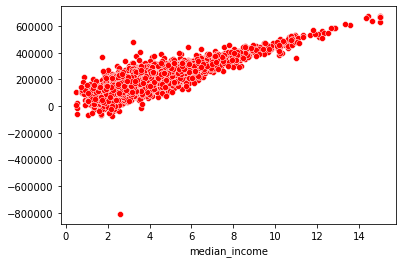

In [88]:
#plot result
sns.scatterplot(x = X_test['median_income'],  y= y_pred, color = "red")
plt.show()

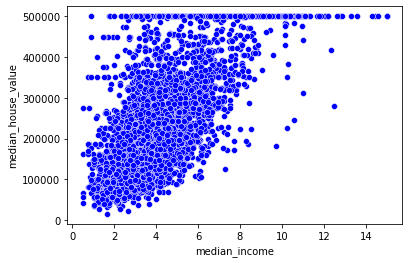

In [89]:
sns.scatterplot(x = X_test['median_income'], y= y_test, color = "blue")
plt.show()

Par défaut, la méthode LinearRegression return un R2 score.  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html =>  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score  

Le score est un peu au dessus de la moyenne ( 0.62 ) mais n'est pas extraordinaire.  

Les plots montrent les prédictions.  
Si la prédiction était parfaite (1 de R2) chaque point rouge serait superposé à chaque point bleu. Ce n'est pas notre cas ici.  

### Test avec PCA <a class="anchor" id="sec1"></a> [Retour](#retour)

In [90]:
df_pca = pd.read_csv('californie_df_pca.csv')
df_pca

,pca_1,pca_2,pca_3,pca_4,target
0,-0.153969,0.493882,-1.786418,-1.574324,72000.0
1,-0.088298,-1.825536,1.325224,-1.818578,274100.0
2,-1.451642,0.449548,-1.683137,-0.522503,58300.0
3,-1.414284,-1.370008,-0.949905,0.057555,200000.0
4,-0.687402,1.107444,-0.381355,-1.056242,117900.0
...,...,...,...,...,...
16507,-1.329967,1.806627,-0.842595,-1.373061,93800.0
16508,-1.055960,2.571173,-0.684864,1.627500,103100.0
16509,-0.321045,1.431865,0.205324,-1.207103,192600.0
16510,1.110756,-0.987009,-1.008277,0.982062,153500.0


In [91]:
X= df_pca.drop('target', axis=1)
y= df_pca['target']

# Splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=40)

In [92]:
X

,pca_1,pca_2,pca_3,pca_4
0,-0.153969,0.493882,-1.786418,-1.574324
1,-0.088298,-1.825536,1.325224,-1.818578
2,-1.451642,0.449548,-1.683137,-0.522503
3,-1.414284,-1.370008,-0.949905,0.057555
4,-0.687402,1.107444,-0.381355,-1.056242
...,...,...,...,...
16507,-1.329967,1.806627,-0.842595,-1.373061
16508,-1.055960,2.571173,-0.684864,1.627500
16509,-0.321045,1.431865,0.205324,-1.207103
16510,1.110756,-0.987009,-1.008277,0.982062


In [93]:
#create the model
log_model_pca = LinearRegression()
#fit
log_model_pca.fit(X_train, y_train)
#predict
y_pred1 = log_model_pca.predict(X_test)

log_model_pca.score(X_test,y_test)

0.8710568762342062

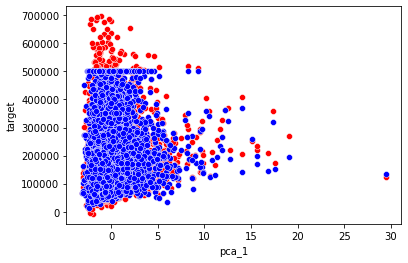

In [94]:
#plot result
sns.scatterplot(x = X_test['pca_1'], y= y_pred1, color = "red")
sns.scatterplot(x = X_test['pca_1'], y= y_test, data= df_pca, color = "blue")
plt.show()

In [95]:
df_pca_dum = pd.read_csv('californie_dummies_pca.csv')
df_pca_dum

,pca_1,pca_2,pca_3,target
0,-0.144834,0.838081,-1.654927,72000.0
1,-0.175479,-1.692233,1.119462,274100.0
2,-1.443136,0.790777,-1.562187,58300.0
3,-1.494246,-0.878052,-1.062725,200000.0
4,-0.663117,1.294047,-0.141289,117900.0
...,...,...,...,...
16507,-1.293395,2.162680,-0.444798,93800.0
16508,-0.890642,1.939748,-0.491961,103100.0
16509,-0.288853,1.545339,0.502312,192600.0
16510,1.042849,-0.602398,-1.093361,153500.0


In [96]:
X_= df_pca_dum.drop('target', axis=1)
y_= df_pca_dum['target']

# Splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X_, y_, 
                                                    test_size=.3, 
                                                    random_state=40)

In [97]:
#creat the model
log_model = LinearRegression()
#fit
log_model.fit(X_train, y_train)
#predict
y_pred2 = log_model.predict(X_test)

log_model.score(X_test,y_test)

0.8500168022577564

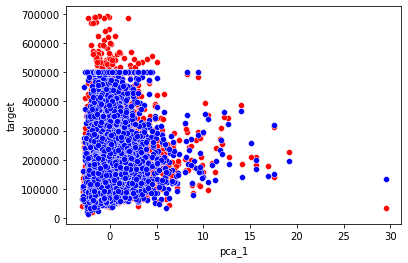

In [98]:
#plot result
sns.scatterplot(x = X_test['pca_1'], y= y_pred2, color = "red")
sns.scatterplot(x = X_test['pca_1'], y= y_test, data= df_pca_dum, color = "blue")
plt.show()

### Test avec les données Standardisées <a class="anchor" id="sec2"></a> [Retour](#retour)

In [99]:
df_californie_std = pd.read_csv('df_californie_std.csv')

In [100]:
df_californie_std

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.137635,0.534564,-1.795939,-0.357368,-0.142008,-0.032827,-0.218173,-1.258403,-1.167387,0.091600
1,0.879836,-0.909979,-1.637178,-0.276515,-0.432723,-0.494784,-0.417841,1.610623,0.586611,-0.904773
2,-0.312201,0.455091,-0.287715,-0.799127,-0.749228,-0.435204,-0.744572,-1.220425,-1.286288,0.091600
3,0.620480,-0.713633,0.188566,-0.913406,-0.714061,-0.723603,-0.710862,-1.233736,-0.056493,-0.904773
4,-0.830911,1.011403,-0.605236,-0.326201,-0.376456,-0.263373,-0.334862,0.114837,-0.769028,0.091600
...,...,...,...,...,...,...,...,...,...,...
16507,-1.165080,1.852884,-0.684616,-0.532626,-0.599182,-0.595810,-0.651220,-0.423409,-0.978188,0.091600
16508,-1.339646,1.161000,1.617410,-0.126100,-0.069329,-0.262510,-0.111856,-0.660681,-0.897475,2.084345
16509,-0.825923,1.539666,-0.763996,-0.051119,-0.170141,-0.197750,-0.187056,0.333675,-0.120716,0.091600
16510,0.710257,-0.685584,0.823608,0.059547,0.718417,0.959301,0.704970,-0.680911,-0.460060,-0.904773


In [101]:
X= df_californie_std.drop('median_house_value', axis=1)
y= df_californie_std['median_house_value']

# Splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=40)

In [102]:
#creat the model
log_model = LinearRegression()
#fit
log_model.fit(X_train, y_train)
#predict
y_pred4 = log_model.predict(X_test)

log_model.score(X_test,y_test)

0.6156028588903351

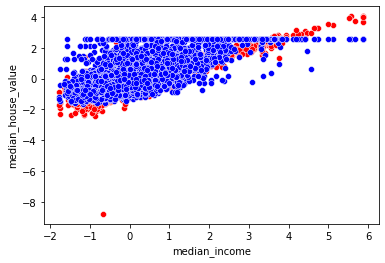

In [103]:
#plot result
sns.scatterplot(x = X_test['median_income'], y= y_pred4, color = "red")
sns.scatterplot(x = X_test['median_income'], y= y_test, data= df_californie_std, color = "blue")
plt.show()

La méthode standardisée fonctionne moins bien que la PCA.

### Test avec les données Normalisées <a class="anchor" id="sec3"></a> [Retour](#retour)

In [104]:
df_californie_minmax = pd.read_csv('df_californie_minmax.csv')
df_californie_minmax

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.449203,0.449522,0.098039,0.046981,0.073390,0.039071,0.068257,0.067709,0.117527,0.25
1,0.652390,0.121148,0.137255,0.051534,0.054151,0.024076,0.055592,0.442297,0.534227,0.00
2,0.414343,0.431456,0.470588,0.022104,0.033204,0.026010,0.034868,0.072668,0.089280,0.25
3,0.600598,0.165781,0.588235,0.015669,0.035531,0.016648,0.037007,0.070930,0.381444,0.00
4,0.310757,0.557917,0.392157,0.048736,0.057874,0.031587,0.060855,0.247003,0.212166,0.25
...,...,...,...,...,...,...,...,...,...,...
16507,0.244024,0.749203,0.372549,0.037111,0.043134,0.020797,0.040789,0.176729,0.162476,0.25
16508,0.209163,0.591923,0.941176,0.060004,0.078200,0.031615,0.075000,0.145750,0.181651,0.75
16509,0.311753,0.678002,0.352941,0.064226,0.071528,0.033717,0.070230,0.275576,0.366186,0.25
16510,0.618526,0.172157,0.745098,0.070458,0.130334,0.071274,0.126809,0.143108,0.285568,0.00


In [105]:
X= df_californie_minmax.drop('median_house_value', axis=1)
y= df_californie_minmax['median_house_value']

# Splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=40)

In [106]:
#creat the model
log_model = LinearRegression()
#fit
log_model.fit(X_train, y_train)
#predict
y_pred5 = log_model.predict(X_test)

log_model.score(X_test,y_test)

0.6156028588903351

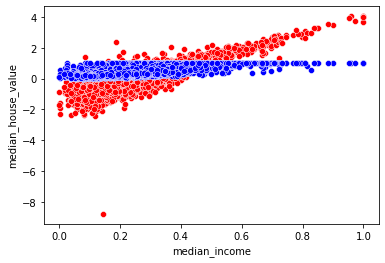

In [107]:
#plot result
sns.scatterplot(x = X_test['median_income'], y= y_pred4, color = "red")
sns.scatterplot(x = X_test['median_income'], y= y_test, data= df_californie_minmax, color = "blue")
plt.show()

Le score n'a pas bougé. On peut conclure que les méthodes de standardisation et de normalisation ne conviennent pas pour ces données.